In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display     import HTML
from statsmodels.tsa.seasonal import seasonal_decompose


In [82]:
# adjust jupyter notebook viz
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 10]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [63]:
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

df = pd.read_csv(dataset_path)

In [64]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [65]:
df.index = pd.to_datetime(df['DATE'])

In [68]:
df = df.drop(columns='DATE')

In [69]:
df.head() 

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


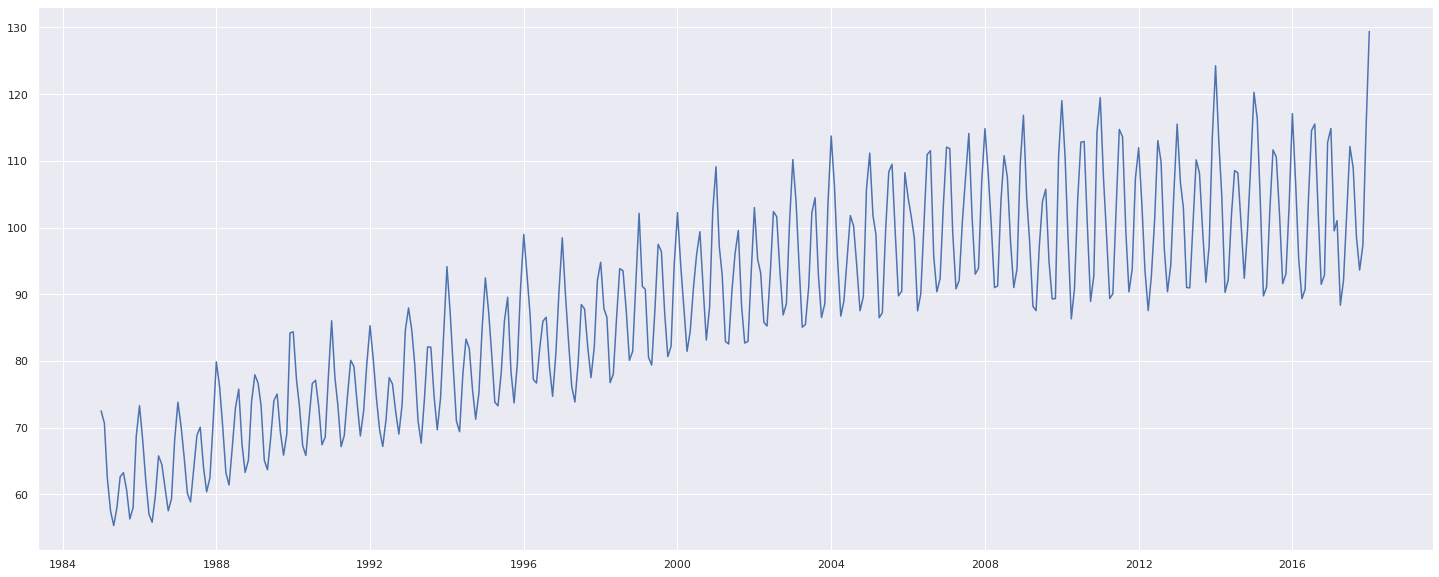

In [83]:
plt.plot(df.index, df.Value)

# Decomposicoa de Time Series

In [78]:
result = seasonal_decompose(df.Value)

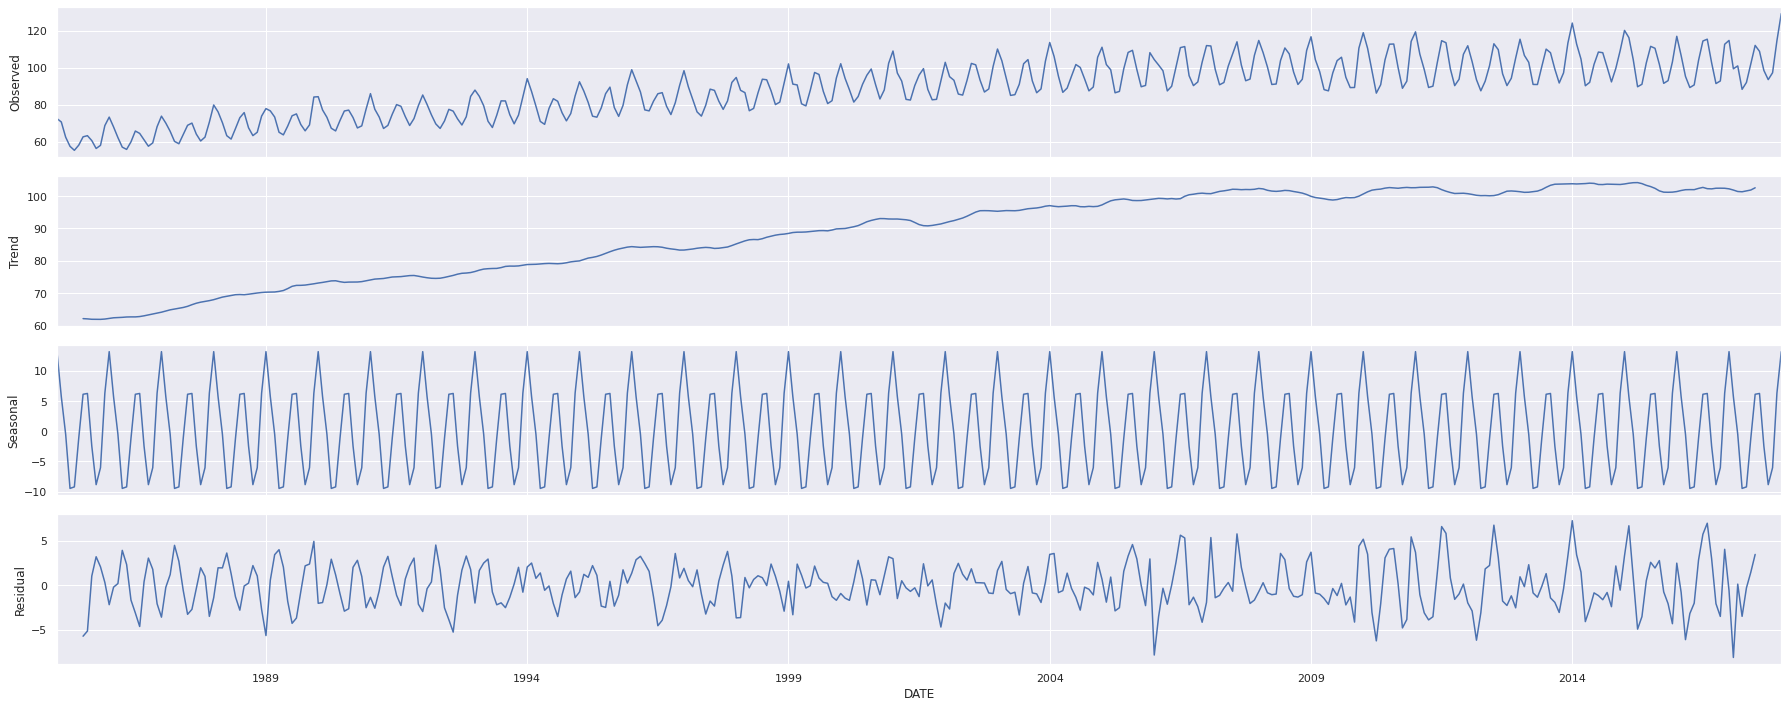

In [84]:
result.plot();

# Novo caso de Analise Exploratoria

In [99]:
path_2 = "https://github.com/carlosfab/escola-data-science/raw/master/datasets/companhia_ferroviaria/trem.csv"
df2 = pd.read_csv(path_2)

In [100]:
df2['Datetime'] = pd.to_datetime(df2.Datetime)

In [101]:
df2.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [94]:
 df2.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


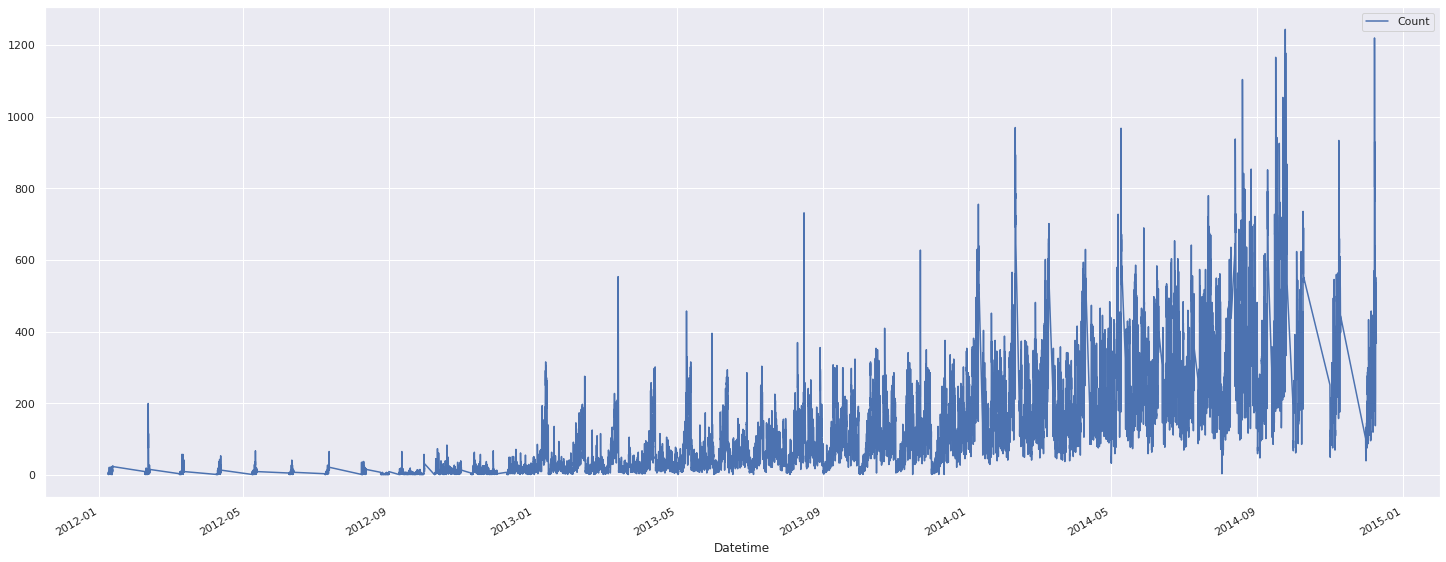

In [96]:
df2.plot(x = 'Datetime', y = 'Count' );

### Hipoteses

1.   Pessoas se moveimentam mais durante a semana
2.   Ha horarios de pico por causa de idas e vindas do trabalho
3.   Ha periodos no mes onde a demanda por transportes e' maior




### Criadno novas vairaveis de tempo

In [106]:
# Criado features de tempo
df2['year'] = df2.Datetime.dt.year

df2['month'] = df2.Datetime.dt.month

df2['day'] = df2.Datetime.dt.day

df2['hour'] = df2.Datetime.dt.hour

# criar day of week, sanendo que nosso dia comeca de 0 como segunda feira

df2['day_of_week'] = df2.Datetime.dt.dayofweek


In [107]:
df2.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


## Validando Hipoteses

1.   Pessoas se moveimentam mais durante a semana



In [110]:
# Se for final de semana, ou seja dia ==5 sabado ou dia ==6 domingo, weekend == 1

df2.loc[(df2['day_of_week'] == 5) | (df2['day_of_week'] == 6), 'weekend'] = 1

In [111]:
df2.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [112]:
# verificar numero de final de semana vs semana laboral

df2.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

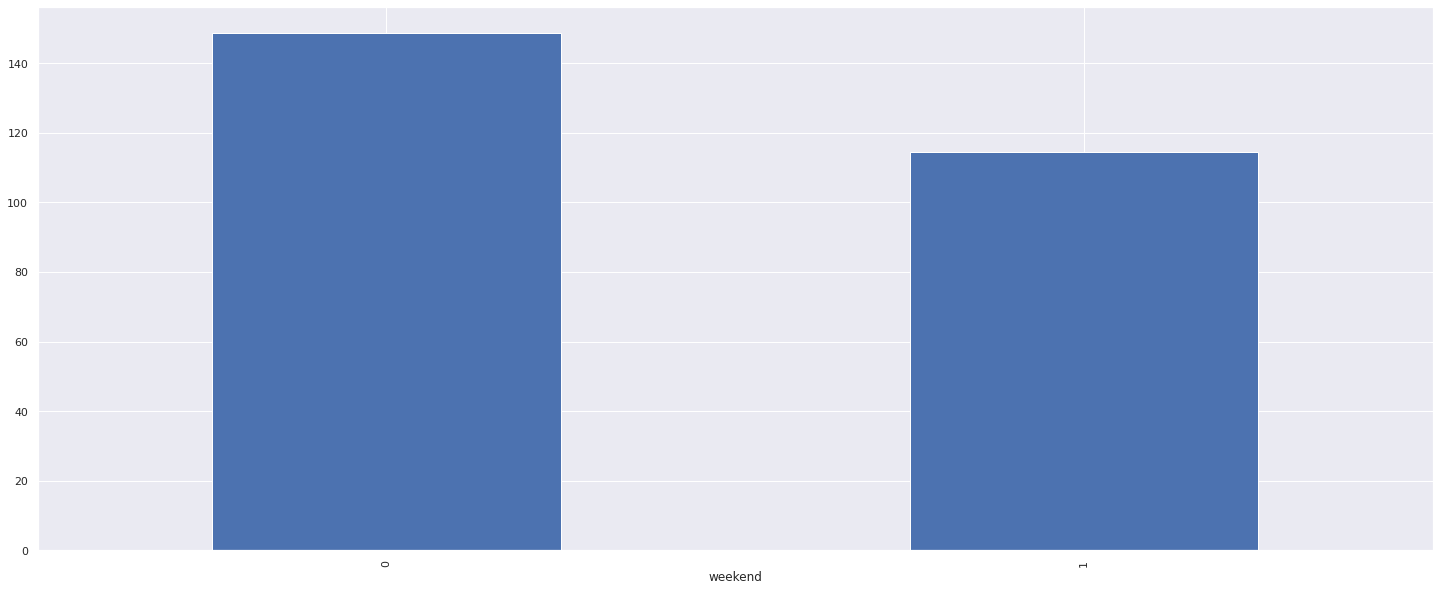

In [114]:
#  Agrupando final de semana e dia laboral

df2.groupby('weekend').Count.mean().plot.bar()

2.   Observar horarios de pico das 23 - - noite

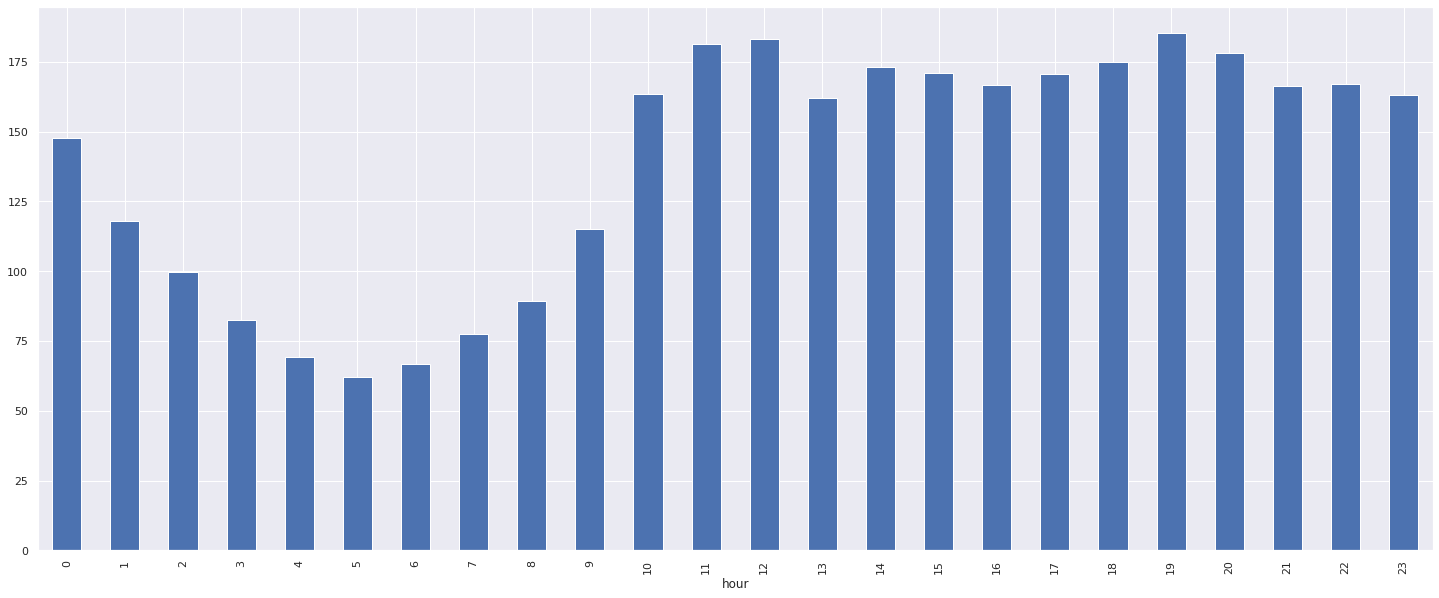

In [116]:
df2.groupby('hour').Count.mean().plot.bar()

3.   Observar periodos  de pico ao longo do ano de Mes 1(Jan) ate 12(Dez)

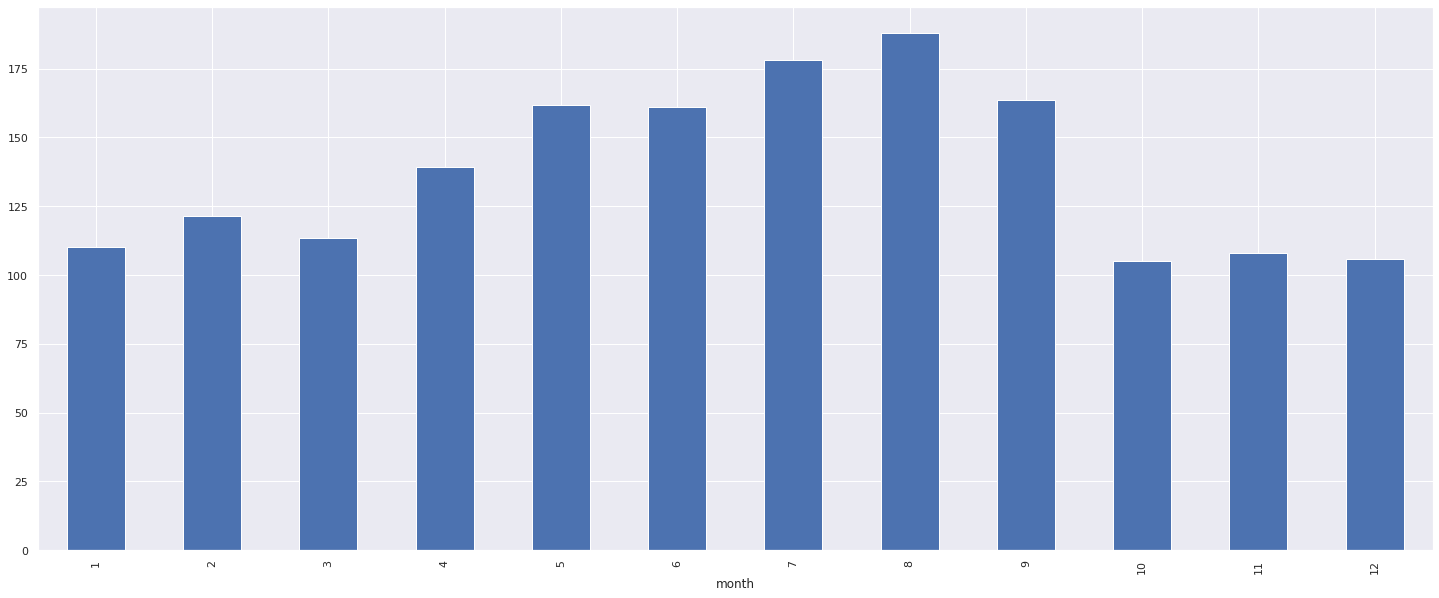

In [118]:
df2.groupby('month').Count.mean().plot.bar()